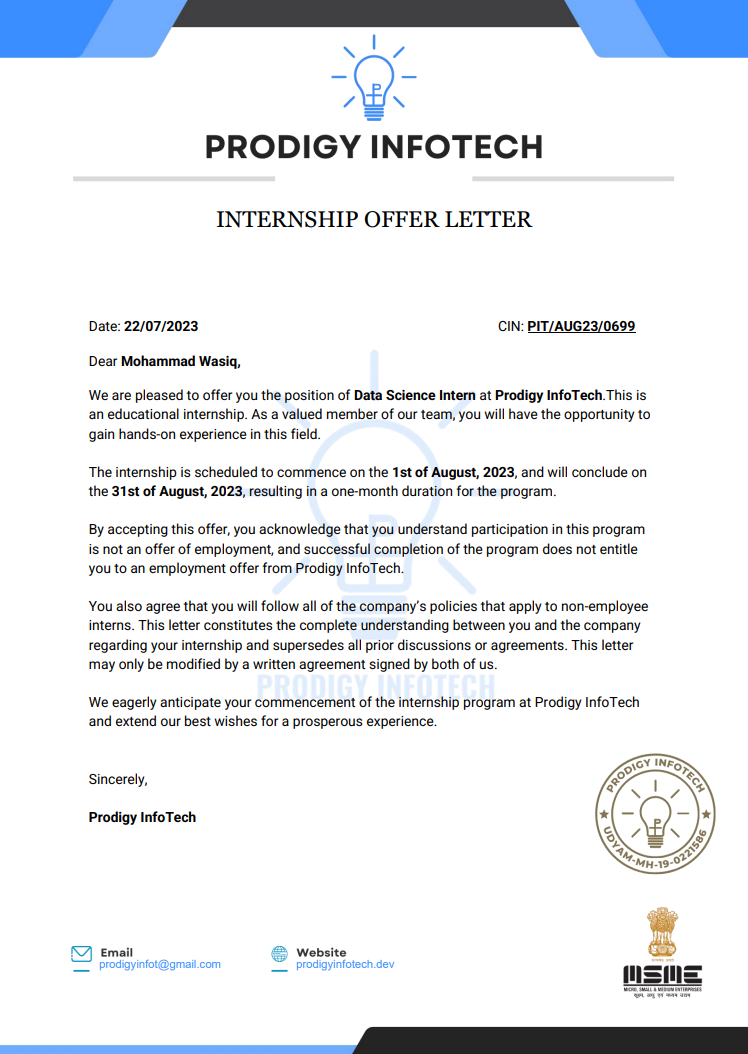

## Introduction
This kernel was inspired by the work of @Fabrizio,@Mina and @ Mat's joint [notebook](https://www.kaggle.com/code/fabriziorossi/accident-severity-prediction) work on previous version of this US-Accidents Dataset. It's a great quality of work from analysis of dataset to model training. In this NB, I am processing the new version of dataset with some changes and training the model with various classifier regressors. I am open to any criticism and update on this work. 

The following kernel contains the steps enumerated below for processing the US Accidents Dataset:
1. [Importing the necessary Libraries](#t1.)

2. [Data Import](#t2.)

3. [Data Cleaning & Transformation P1](#t3.)
    * 3.1. [Data Splitting to explore Numerical & Object dtype columns](#t3.1.)
    
4. [Performing basic cleaning and transforming data columns](#t4.)
    * 4.1. [Data Imputation](#t4.1.)
    * 4.2. [Few Categorical Column Encoding](#t4.2.)
    * 4.3. [Combining the Cleaned Data](#t4.3.)

5. [Exploring Cleaned Data with Viz's](#t5.)
    * 5.1. [Accidents for Each State](#t5.1.)
    * 5.2. [Cities with Highest Number of Accidents](#t5.2.)
    * 5.3. [Major Days of Accidents](#t5.3.)
    * 5.4. [Major Weather Conditions During Accidents](#t5.4.)
    * 5.5. [Frequent Words used to Describe Each Severity Level Of Accidents](#t5.5.)
    * 5.6. [Year Wise Accidents Distributions for Various Severity Level of Accidents](#t5.6.)
    * 5.7. [Numerical Feature Correlations](#t5.7.)
    
6. [Data Cleaning and Transformation P2](#t6.)
    * 6.1. [Feature Selection](#t6.1.)
    * 6.2. [Dropping Duplicates](#t6.2.)
    * 6.3. [Reforming Categorical Columns](#t6.3.)
    * 6.4. [Handling Unbalanced Data](#t6.4.)
    * 6.5. [Feature Scaling](#t6.5.)
    * 6.6. [Target Encoding for Cities Columns](#t6.6.)
    * 6.7. [Saving the Data](#t6.7.)

7. [Model Training](https://www.kaggle.com/code/yuvrajdhepe/project-4-us-accidents-model-runs/notebook)

### Naming Conventions:
- 1) df_original: Data Imported
- 2) df_base: Data Frame used during first exploration
- 3) df_clean: Cleaned Data Frame
- 4) df_balanced: Clean and Balanced Data Frame wrt Target Features
- 5) df_model: DataFrame used during the training

### Work Brief
- We will import the dataset as it is and perform ETA on this data to make it Suitable for Model Training
- **The notebook has comments and markdown texts to explain the code and what I am doing at necessary places**

<a id="t1."></a>
## 1. Importing the necessary Libraries

In [1]:
import pandas as pd
import pyarrow as pa
import polars as pl
import vaex as vx
#import pyarrow.parquet as pq
#import dask.dataframe as dd

import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from nltk.corpus import stopwords

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.impute import SimpleImputer
#from ydata_profiling import ProfileReport

<a id="t2."></a>
## 2. Data Import

In [2]:
df_original = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv",index_col = 0,parse_dates=['Start_Time','End_Time'],infer_datetime_format=True)

In [3]:
df_base = df_original.copy()

In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, A-1 to A-7777761
Data columns (total 45 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Source                 object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Country                object        
 16  Timezone               object        
 17  Airport_Code           object        
 18  Weather_Timestamp      

In [5]:
df_base.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


<a id="t3."></a>
## 3. Data Cleaning and Transformation P1
- Observe unique and missing values for categorical and numerical columns 
- Based on these observations, we will do simple cleaning and transformation on data

<a id="t3.1."></a>
### Splitting the huge data into numerical and object data types for proper data exploration

In [6]:
df_obj = df_base.select_dtypes(include = ['object'])
df_num = df_base.select_dtypes(exclude = ['object'])

### Seeing the uniqueness of object attributes 

In [7]:
df_obj_nunique = df_obj.nunique().reset_index()
df_obj_nunique.columns = ['columns_name','unique_value_count']
df_obj_nunique['unique_ratio'] = df_obj_nunique['unique_value_count']/df_base.shape[0]
df_obj_nunique.sort_values(by='unique_ratio', ascending =False)

,columns_name,unique_value_count,unique_ratio
1,Description,3761578,4.867218e-01
10,Weather_Timestamp,941331,1.218016e-01
6,Zipcode,825094,1.067614e-01
2,Street,336306,4.351564e-02
3,City,13678,1.769837e-03
9,Airport_Code,2045,2.646087e-04
4,County,1871,2.420943e-04
12,Weather_Condition,144,1.863259e-05
5,State,49,6.340256e-06
11,Wind_Direction,24,3.105432e-06


### Seeing the uniqueness of numeric attributes 

In [8]:
df_num_nunique = df_num.nunique().reset_index()
df_num_nunique.columns = ['columns_name','unique_value_count']
df_num_nunique['unique_ratio'] = df_num_nunique['unique_value_count']/df_base.shape[0]
df_num_nunique.sort_values(by='unique_ratio', ascending =False)

,columns_name,unique_value_count,unique_ratio
2,End_Time,6463024,8.362700e-01
1,Start_Time,5801064,7.506170e-01
4,Start_Lng,2482533,3.212224e-01
3,Start_Lat,2428358,3.142125e-01
6,End_Lng,1605789,2.077778e-01
5,End_Lat,1568172,2.029105e-01
7,Distance(mi),22382,2.896074e-03
11,Pressure(in),1144,1.480256e-04
9,Wind_Chill(F),1001,1.295224e-04
8,Temperature(F),860,1.112780e-04


### Seeing the nullness of numeric attributes

In [9]:
df_missing = df_num.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df_base.shape[0]
df_missing.query('missing_ratio > 0').sort_values(by = 'missing_ratio',ascending=False)

,columns_name,missing_count,missing_ratio
5,End_Lat,3402762,0.440294
6,End_Lng,3402762,0.440294
14,Precipitation(in),2203586,0.285129
9,Wind_Chill(F),1999019,0.258659
13,Wind_Speed(mph),571233,0.073914
12,Visibility(mi),177098,0.022915
10,Humidity(%),174144,0.022533
8,Temperature(F),163853,0.021201
11,Pressure(in),140679,0.018203


### Seeing the nullness of object attributes

In [10]:
df_missing = df_obj.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df_base.shape[0]
df_missing.query('missing_ratio > 0').sort_values(by = 'missing_ratio',ascending=False)

,columns_name,missing_count,missing_ratio
11,Wind_Direction,175206,2.267043e-02
12,Weather_Condition,173459,2.244438e-02
10,Weather_Timestamp,120228,1.555666e-02
13,Sunrise_Sunset,23246,3.007869e-03
14,Civil_Twilight,23246,3.007869e-03
15,Nautical_Twilight,23246,3.007869e-03
16,Astronomical_Twilight,23246,3.007869e-03
9,Airport_Code,22635,2.928810e-03
2,Street,10869,1.406372e-03
8,Timezone,7808,1.010300e-03


<a id="t4."></a>
## 4. Cleaning and Transforming Data based on above observations
- From the object columns
    - *Remove Country*: Every instance is of only America, so this column doesn't provide any useful information
    - *Remove Description*: (Can't be used for regression task) # After visualizing it.
    - *Impute the missing entries* via the *most-frequent* value in that column
    - *Extract date contents* from start time like hour, min ... etc
    - Find the *total time* for accident via use of start and end time
    - Encode *sun-light* related and *timezones columns*
    
- From the numerical columns
    - *Remove the Turning Loop*: All instances have same value, gives no variance to dataset
    - *Remove End_Lat, End_Lng, Precipitation, Wind Chill Columns* as they have many missing values
    
- Remove all the cols that are very less correlated to the Severity Column
    - For simplicity we are considering columns to be independent from the *Severity* target so if there is less variance in a column we will remove it.
    - **Future improvement** 
        - One can look onto the task that if a column doesn't have much variance on it's own combining it with others may make cols significant


In [11]:
df_clean = df_base[[col for col in df_base.columns if col not in ['End_Lat','End_Lng', 'Precipitation(in)', 'Wind_Chill(F)', 'Turning_Loop', 'Country']]]
df_clean_obj = df_clean.select_dtypes(include = ['object'])
df_clean_num = df_clean.select_dtypes(exclude = ['object','datetime64']) #Excluding date time since it has no null values and imputation doesn't work on this dt

In [12]:
len(df_clean_obj.columns)+len(df_clean_num.columns)

37

<a id="t4.1."></a>
### Perform simple imputation on the data

In [13]:
# # Using the vectorized version above to speed up the process instead of this.
# Performing simple imputation on numerical and object cols
obj_imputer = SimpleImputer(strategy = 'most_frequent')
df_cl_obj = pd.DataFrame(obj_imputer.fit_transform(df_clean_obj),columns=df_clean_obj.columns, index=df_clean_obj.index)
# df_cl_obj.head()

In [14]:
num_imputer = SimpleImputer(strategy = 'mean')
df_cl_num = pd.DataFrame(num_imputer.fit_transform(df_clean_num),columns=df_clean_num.columns, index=df_clean_num.index)
# df_cl_num.head()

In [15]:
print((df_clean_obj.County == df_cl_obj.County).all()) 
# Verify imputation didn't messed up entries, by comparing non null columns 
# If non-null columns stay same as the original db for every entry we are good.

print((df_clean_num['Distance(mi)'] == df_cl_num['Distance(mi)']).all())

True
True


In [16]:
df_clean_obj = pd.concat([df_cl_obj,df_base.loc[:,['Start_Time','End_Time']]],axis = 1) #Setting the original obj_df with imputed one
df_clean_num = df_cl_num

<a id="t4.2."></a>
### Doing Encoding of few Categorical columns

In [17]:
## Encoding sides and accident times as per twilight zones
mapping_1 = {'Day':1, 'Night': 0}
times = ["Civil_Twilight","Nautical_Twilight","Astronomical_Twilight","Sunrise_Sunset"]
df_clean_obj[times] = (df_clean_obj[times].replace(mapping_1))

mapping_2 = {'US/Eastern':1,'US/Pacific':2,'US/Central':3,'US/Mountain':4}
df_clean_obj[['Timezone']] = (df_clean_obj[["Timezone"]].replace(mapping_2))

In [18]:
# Extract year, month, day, hour and weekday
df_clean_obj['Year'] = (df_clean_obj['Start_Time'].dt.year).astype('uint16')
df_clean_obj['Month'] = (df_clean_obj['Start_Time'].dt.strftime('%b')).astype('category')
df_clean_obj['Day'] = (df_clean_obj['Start_Time'].dt.day).astype('uint8')
df_clean_obj['Hour'] = (df_clean_obj['Start_Time'].dt.hour).astype('uint8')
df_clean_obj['Min'] = (df_clean_obj['Start_Time'].dt.minute).astype('float32')
df_clean_obj['Weekday'] = (df_clean_obj['Start_Time'].dt.strftime("%a")).astype('category')

# Extract the amount of time in the unit of mins for each accident, rounded to the nearest integer
td = "Time_Duration(min)"
df_clean_obj[td] = (round((df_clean_obj['End_Time'] - df_clean_obj['Start_Time'])/np.timedelta64(1,'m'),3)).astype('float32')

In [19]:
# Observing this column we get few rows with -ve outliers
neg_outliers = df_clean_obj[td]<=0

# Set outliers to NAN
df_clean_obj[neg_outliers] = np.nan

# **Drop rows with negative td**
df_clean_obj.dropna(subset = [td], axis = 0, inplace = True)

#df["month"]=df["month"].map({1:"janurary",2:"feburary",3:"march",4:"april",5:"may",6:"june",7:"july",8:"august",9:"september",10:"october",11:"november",12:"december"})
#df["dayofweek"]=df["dayofweek"].map({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"})

In [20]:
## Convert Dtypes for faster processing of dataset
obj_dtypes = {'Source':'category',
        'Description':'string', 
        'Street':'category',
        'City':'category', 
        'County':'category',
        'State':'category', 
        'Zipcode':'category',
        'Timezone':'uint8',
        'Airport_Code':'category',
        'Weather_Timestamp':'string',
        'Wind_Direction':'category',
        'Weather_Condition':'string',
        'Sunrise_Sunset':'bool',
        'Civil_Twilight':'bool',
        'Nautical_Twilight':'bool', 
        'Astronomical_Twilight':'bool',
        'Start_Time':'datetime64[ns]',
        'End_Time':'datetime64[ns]',
        'Year':'uint16',
        'Day':'uint8',
        'Hour':'uint8',
        'Min': 'uint8',
        'Weekday': 'category',
        'Time_Duration(min)':'float32',
        'Month':'category'}

num_dtypes = { 'Severity':'uint8',
            'Start_Lat': 'float32',
            'Start_Lng': 'float32',
            'Distance(mi)': 'float32',
            'Temperature(F)': 'float32',
            'Humidity(%)': 'float32',
            'Pressure(in)': 'float32',
            'Visibility(mi)': 'float32',
            'Wind_Speed(mph)': 'float32',
            'Amenity':'bool',
            'Bump':"bool",
            'Crossing':'bool',
            'Give_Way':'bool',
            'Junction':'bool',
            'No_Exit':'bool',
            'Railway':'bool',
            'Roundabout':'bool',
            'Station':'bool', 
            'Stop':'bool',
            'Traffic_Calming':'bool',
            'Traffic_Signal':'bool',
             }
df_clean_obj = df_clean_obj.astype(obj_dtypes)
df_clean_num = df_clean_num.astype(num_dtypes)

<a id="t4.3."></a>
### Combining the cleaned and transformed data

In [21]:
df_clean = pd.concat([df_clean_num,df_clean_obj],axis = 1)
df_clean.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Astronomical_Twilight,Start_Time,End_Time,Year,Month,Day,Hour,Min,Weekday,Time_Duration(min)
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,39.865147,-84.058723,0.01,36.900002,91.0,29.680000,10.0,7.68549,False,...,False,2016-02-08 05:46:00,2016-02-08 11:00:00,2016,Feb,8,5,46,Mon,314.0
A-2,2,39.928059,-82.831184,0.01,37.900002,100.0,29.650000,10.0,7.68549,False,...,True,2016-02-08 06:07:59,2016-02-08 06:37:59,2016,Feb,8,6,7,Mon,30.0
A-3,2,39.063148,-84.032608,0.01,36.000000,100.0,29.670000,10.0,3.50000,False,...,True,2016-02-08 06:49:27,2016-02-08 07:19:27,2016,Feb,8,6,49,Mon,30.0
A-4,3,39.747753,-84.205582,0.01,35.099998,96.0,29.639999,9.0,4.60000,False,...,True,2016-02-08 07:23:34,2016-02-08 07:53:34,2016,Feb,8,7,23,Mon,30.0
A-5,2,39.627781,-84.188354,0.01,36.000000,89.0,29.650000,6.0,3.50000,False,...,True,2016-02-08 07:39:07,2016-02-08 08:09:07,2016,Feb,8,7,39,Mon,30.0


In [22]:
df_clean.shape

(7728394, 46)

In [23]:
df_clean.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Timezone,Year,Day,Hour,Min,Time_Duration(min)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,3.620118e+01,-9.470249e+01,5.618423e-01,6.166330e+01,6.483109e+01,2.953901e+01,9.090382e+00,7.685488e+00,1.860421e+00,2.019908e+03,1.574993e+01,1.232857e+01,2.979513e+01,4.444210e+02
std,4.875313e-01,5.076079e+00,1.739176e+01,1.776811e+00,1.881101e+01,2.256239e+01,9.969900e-01,2.657336e+00,5.220645e+00,9.387253e-01,1.914670e+00,8.684967e+00,5.464796e+00,1.725485e+01,1.351229e+04
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.217000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,0.000000e+00,5.000000e+01,4.900000e+01,2.938000e+01,1.000000e+01,5.000000e+00,1.000000e+00,2.018000e+03,8.000000e+00,8.000000e+00,1.500000e+01,3.150000e+01
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.000000e-02,6.300000e+01,6.600000e+01,2.985000e+01,1.000000e+01,7.685490e+00,2.000000e+00,2.020000e+03,1.600000e+01,1.300000e+01,3.000000e+01,7.483300e+01
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.640000e-01,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.000000e+01,3.000000e+00,2.022000e+03,2.300000e+01,1.700000e+01,4.500000e+01,1.251500e+02
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,4.000000e+00,2.023000e+03,3.100000e+01,2.300000e+01,5.900000e+01,2.812939e+06


In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, A-1 to A-7777761
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               uint8         
 1   Start_Lat              float32       
 2   Start_Lng              float32       
 3   Distance(mi)           float32       
 4   Temperature(F)         float32       
 5   Humidity(%)            float32       
 6   Pressure(in)           float32       
 7   Visibility(mi)         float32       
 8   Wind_Speed(mph)        float32       
 9   Amenity                bool          
 10  Bump                   bool          
 11  Crossing               bool          
 12  Give_Way               bool          
 13  Junction               bool          
 14  No_Exit                bool          
 15  Railway                bool          
 16  Roundabout             bool          
 17  Station                bool          
 18  Stop                   

In [25]:
### Seeing the nullness of all the attributes
df_missing = df_clean.isnull().sum(axis = 0).reset_index()
df_missing.columns = ['columns_name', 'missing_count']
df_missing['missing_ratio'] = df_missing['missing_count']/df_clean.shape[0]
df_missing['data_type'] = [df_clean[col].dtypes for col in df_missing.columns_name[:]]
df_missing.query('missing_ratio > 0').sort_values(by = ['missing_ratio','data_type'], ascending = False)

,columns_name,missing_count,missing_ratio,data_type


<a id="t5."></a>
## 5. Exploring the Cleaned Data with Basic Visualization

<a id="t5.1."></a>
### Number of Accidents for Each State in US

In [26]:
%matplotlib inline

In [27]:
state_acc_counts = pd.DataFrame(df_clean['State'].value_counts())
z = state_acc_counts.values.flatten()
x = state_acc_counts.index.to_list()
fig = go.Figure(data = go.Choropleth(locations = x, z = z, locationmode = "USA-states", colorscale = 'ylorrd'))

fig.update_layout(title_text = "Number of Accidents for each State in US", geo_scope = "usa")
fig.show()

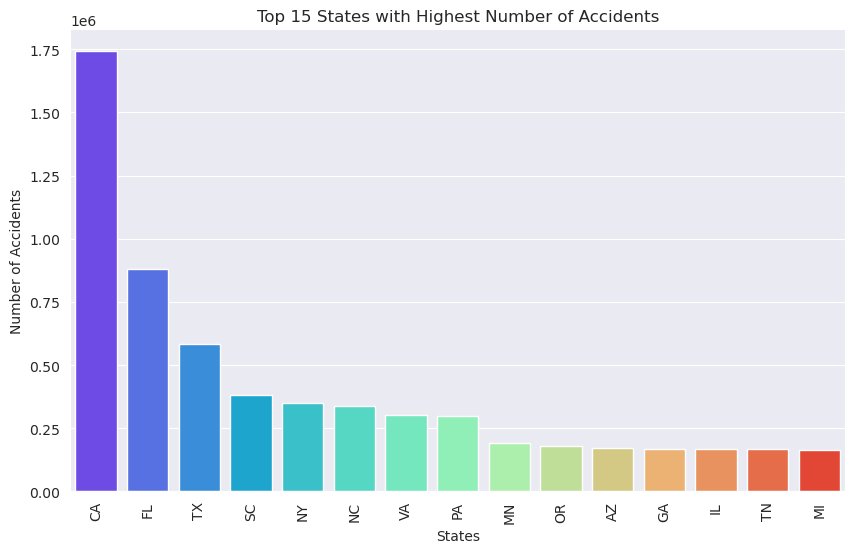

In [28]:
## Observing which states have most accidents
fig,axs = plt.subplots(figsize = (10,6))

x = state_acc_counts[0:15].index.to_list()
y = state_acc_counts[0:15].values.flatten()

sns.barplot(x=x, y = y, palette='rainbow')
axs.tick_params(axis = 'x', rotation = 90)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("Top 15 States with Highest Number of Accidents")
plt.savefig("Top_15_States_Accidents.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- California is the state with highest number of accidents, followed by Florida and Texas

<a id="t5.2."></a>
### Cities with Highest Number of Accidents

In [29]:
city_acc_counts = pd.DataFrame(df_clean['City'].value_counts()).reset_index()
city_acc_counts.columns = ['City',"Number of Accidents"]
city_acc_counts.sort_values(by = 'Number of Accidents', ascending = False,inplace = True)
x = city_acc_counts['City'][:15].to_list()
y = city_acc_counts["Number of Accidents"][:15]

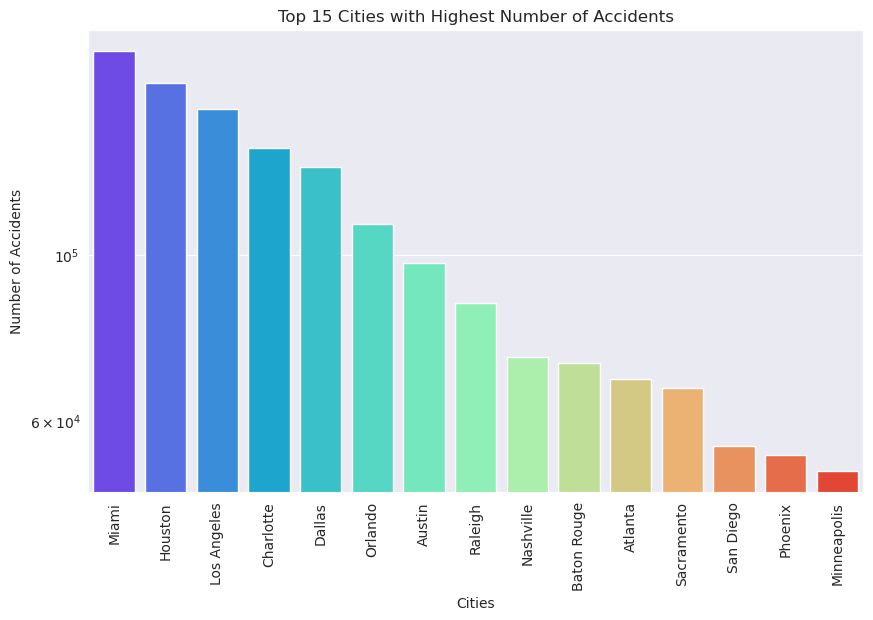

In [30]:
## Observing Top 20 cities have most accidents
fig,axs = plt.subplots(figsize = (10,6))
sns.barplot(x = x,y=y, ax = axs, palette = 'rainbow')
axs.tick_params(axis = 'x', rotation = 90)
axs.set_yscale("log")
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 15 Cities with Highest Number of Accidents")
plt.savefig("Top_15_Cities_Accidents.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- Miami records highest number of accidents followed by Houston, Los Angeles and Charlotte

<a id="t5.3."></a>
### Major days of accidents

In [31]:
weekday_acc_counts = pd.DataFrame(df_clean['Weekday'].value_counts()).reset_index()
weekday_acc_counts.columns = ["Day","Number of Accidents"]
days = weekday_acc_counts['Day']
acc = weekday_acc_counts["Number of Accidents"]
dc = {days[i]:acc[i] for i in range(7)}

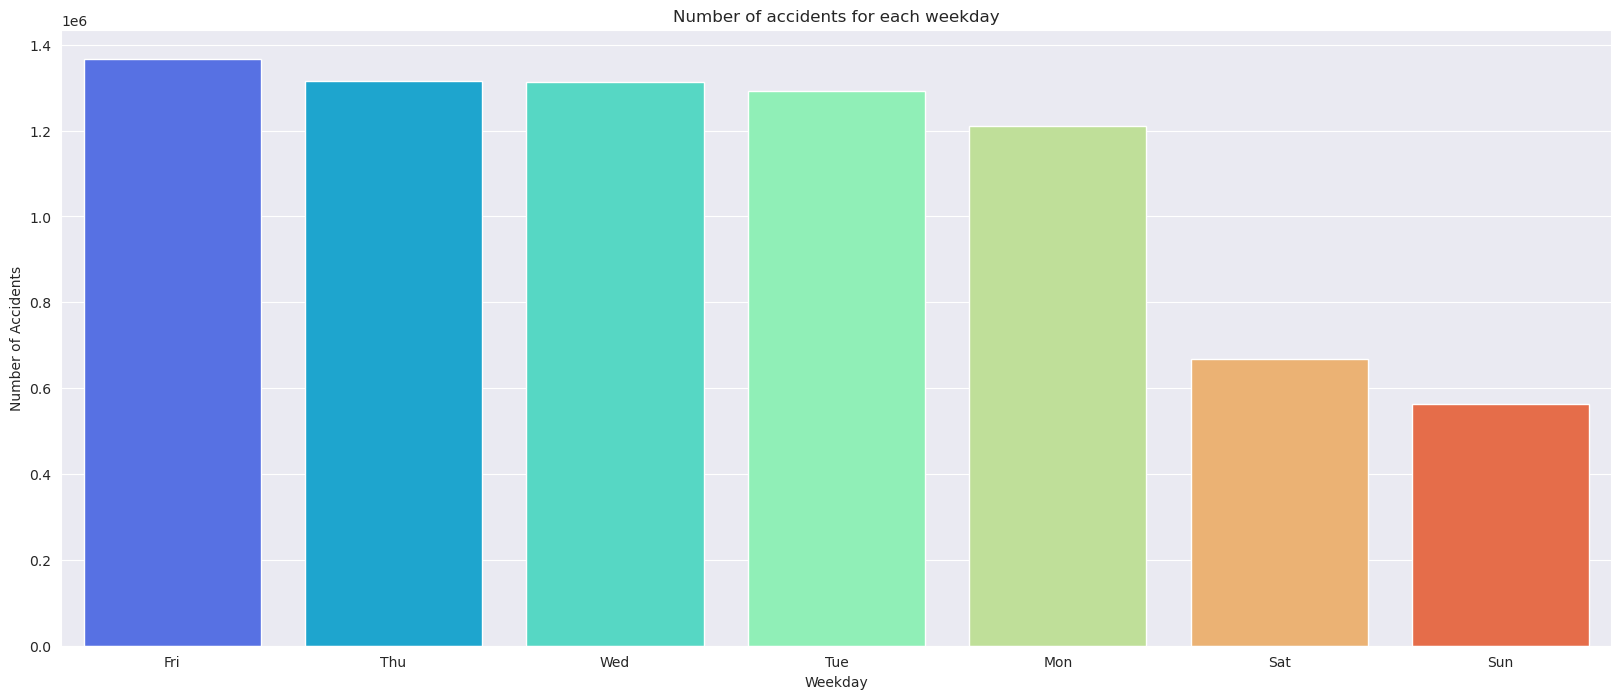

In [32]:
plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x=list(dc.keys()), y = list(dc.values()),palette='rainbow')
plt.xlabel("Weekday")
plt.ylabel("Number of Accidents")
plt.savefig("Accidents_Weekday_Distribution.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- We can observe most of the accidents occurred on working days

<a id="t5.4."></a>
### Major seen weather conditions on the day of accidents

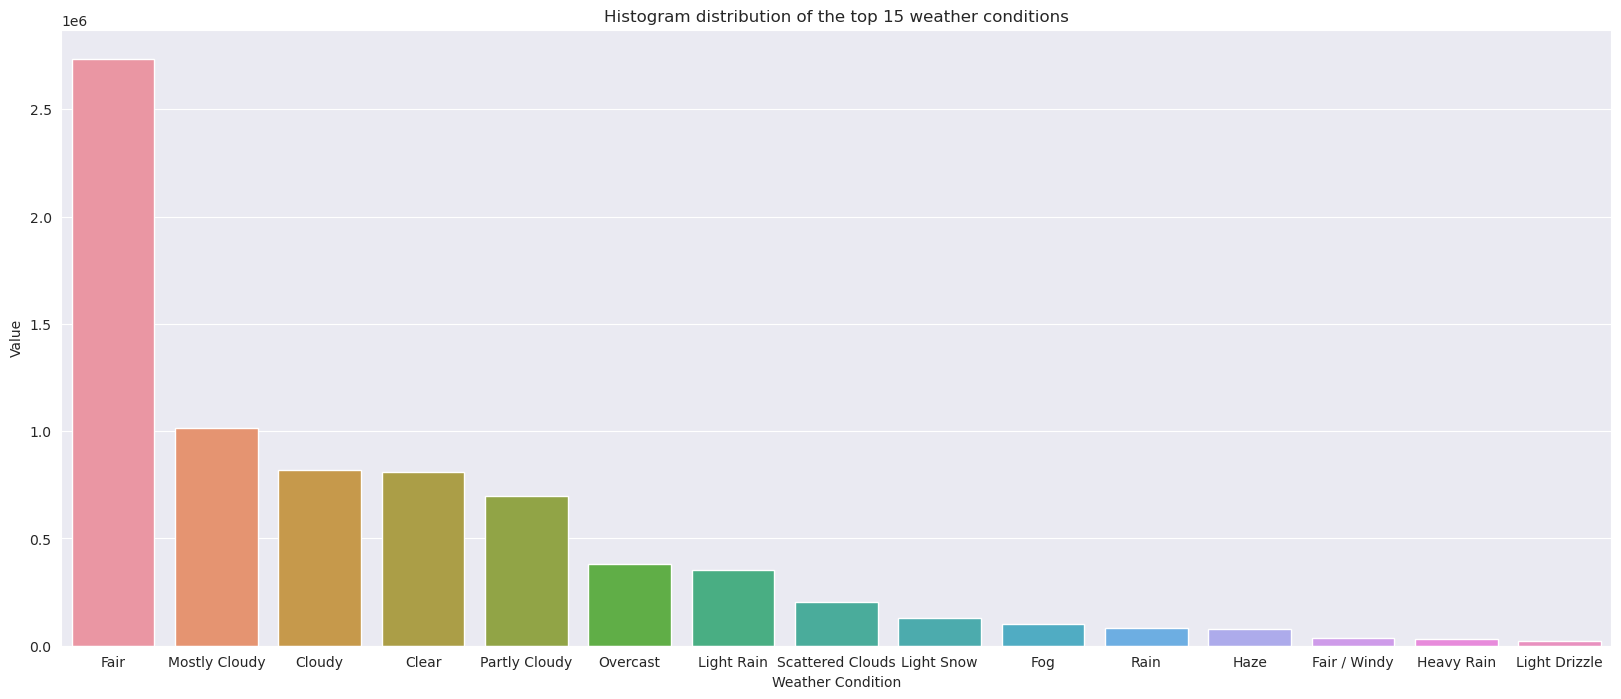

In [33]:
counts = df_clean["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions")
sns.barplot(x = counts.index,y= counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.savefig("Weather_Accident_Distribution.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- Most of the accidents happened on a clear day

<a id="t5.5."></a>
### Most frequent words in the description of an accident at 4 Severity Level

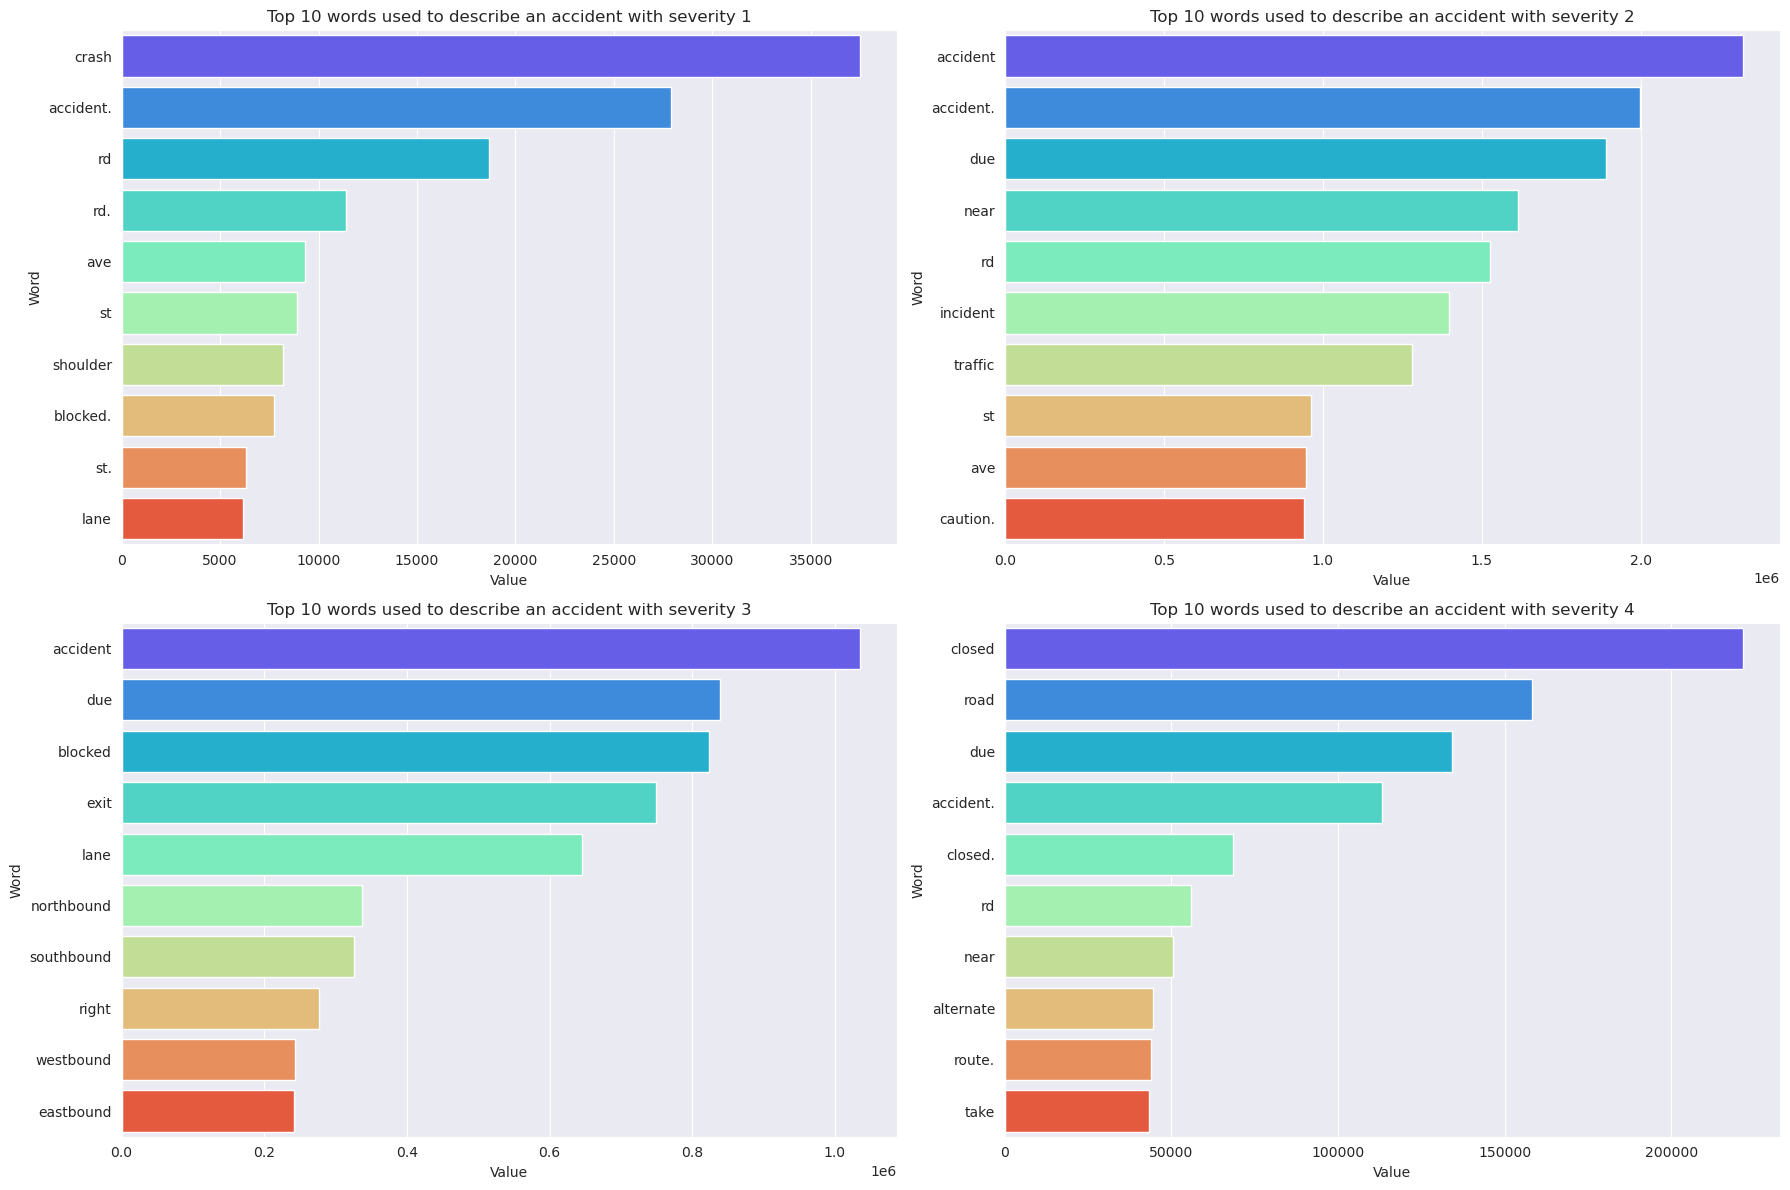

In [34]:
stop = stopwords.words("english") + ["-"]
severity_levels = [1, 2, 3, 4]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.ravel()

for i, severity in enumerate(severity_levels):
    ax = axs[i]
    df_desc = df_clean[df_clean["Severity"] == severity]["Description"]

    # Split the description using vectorized operations
    df_words = df_desc.str.cat(sep=' ').lower().split()

    # Count the words and filter out stopwords
    counts = pd.Series(df_words).value_counts().loc[lambda x: ~x.index.isin(stop)][:10]

    # Plot the barplot
    sns.barplot(x=counts.values, y=counts.index, orient="h", ax=ax, palette='rainbow')
    ax.set_title(f"Top 10 words used to describe an accident with severity {severity}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Word")

plt.savefig("Frequent_Words_PerSeverityLevel.png",bbox_inches = 'tight', dpi = 300)
plt.tight_layout()
plt.show()

#### Observations
- The most notable words during the different accidents are:
    - Level 1: Crash, Accident, Road
    - Level 2: Accident, Due, Road
    - Level 3: Accident, Due, Blocked
    - Level 4: Closed, Road, Due
- So the most observed words are Accident, Road, Due

### Count of Accidents on base of Different Levels of Severity

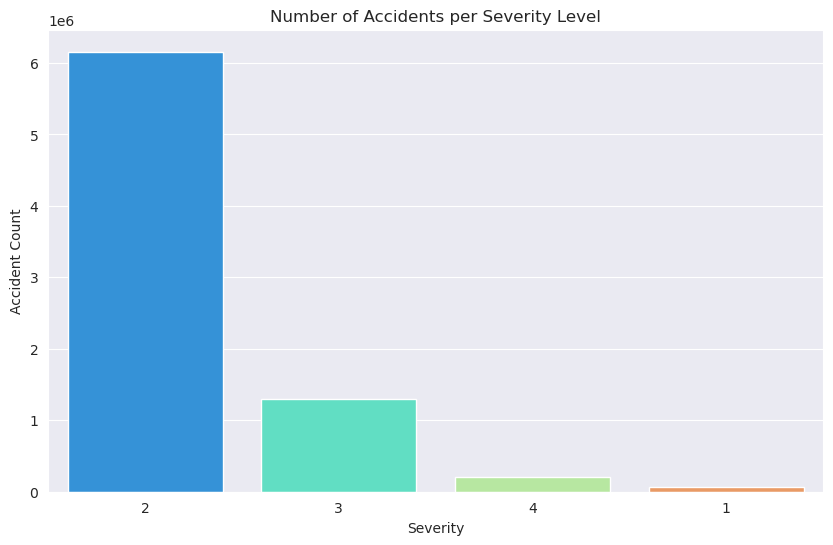

In [35]:
## Observing the severity distribution
fig,axs = plt.subplots(figsize = (10,6))
sns.countplot(x = 'Severity', data = df_clean, ax = axs, order=df_clean.Severity.value_counts().index, palette='rainbow')
axs.tick_params(axis = 'x', rotation = 0)
#axs.set_yscale("log")
axs.set_ylabel("Accident Count")


plt.title("Number of Accidents per Severity Level")
plt.savefig("Num_Accidents_Per_Severity_Level.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- Too many accidents were of Severity level 2, we might need to balance the whole data to make hybrid models


### Count of Accidents on base of Different Sources

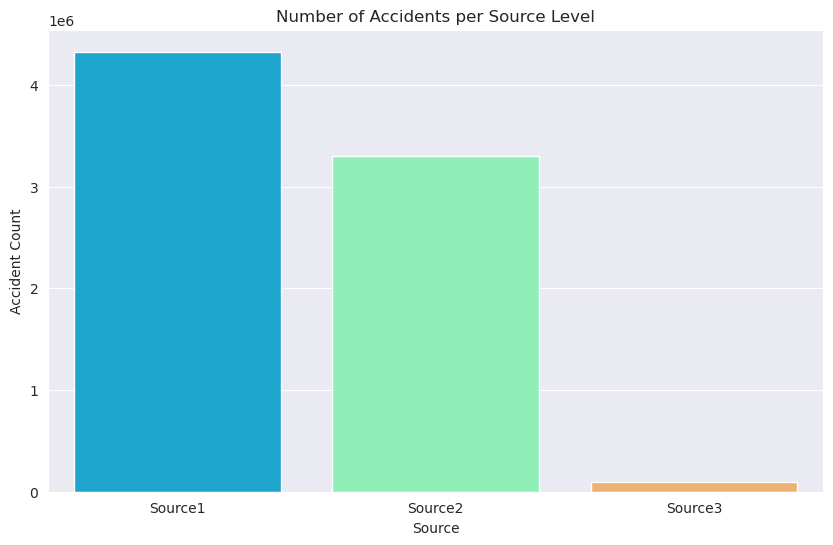

In [36]:
## Observing the severity distribution
fig,axs = plt.subplots(figsize = (10,6))
sns.countplot(x = 'Source', data = df_clean, ax = axs, order=df_clean.Source.value_counts().index, palette='rainbow')
axs.tick_params(axis = 'x', rotation = 0)
#axs.set_yscale("log")
axs.set_ylabel("Accident Count")

plt.title("Number of Accidents per Source Level")
plt.savefig("Accidents_Per_Source_Level.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- Too many accidents were from Source 1


<a id="t5.7."></a>
### Feature Correlations Among Themselves and With Target Feature

/tmp/ipykernel_20/2884192508.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



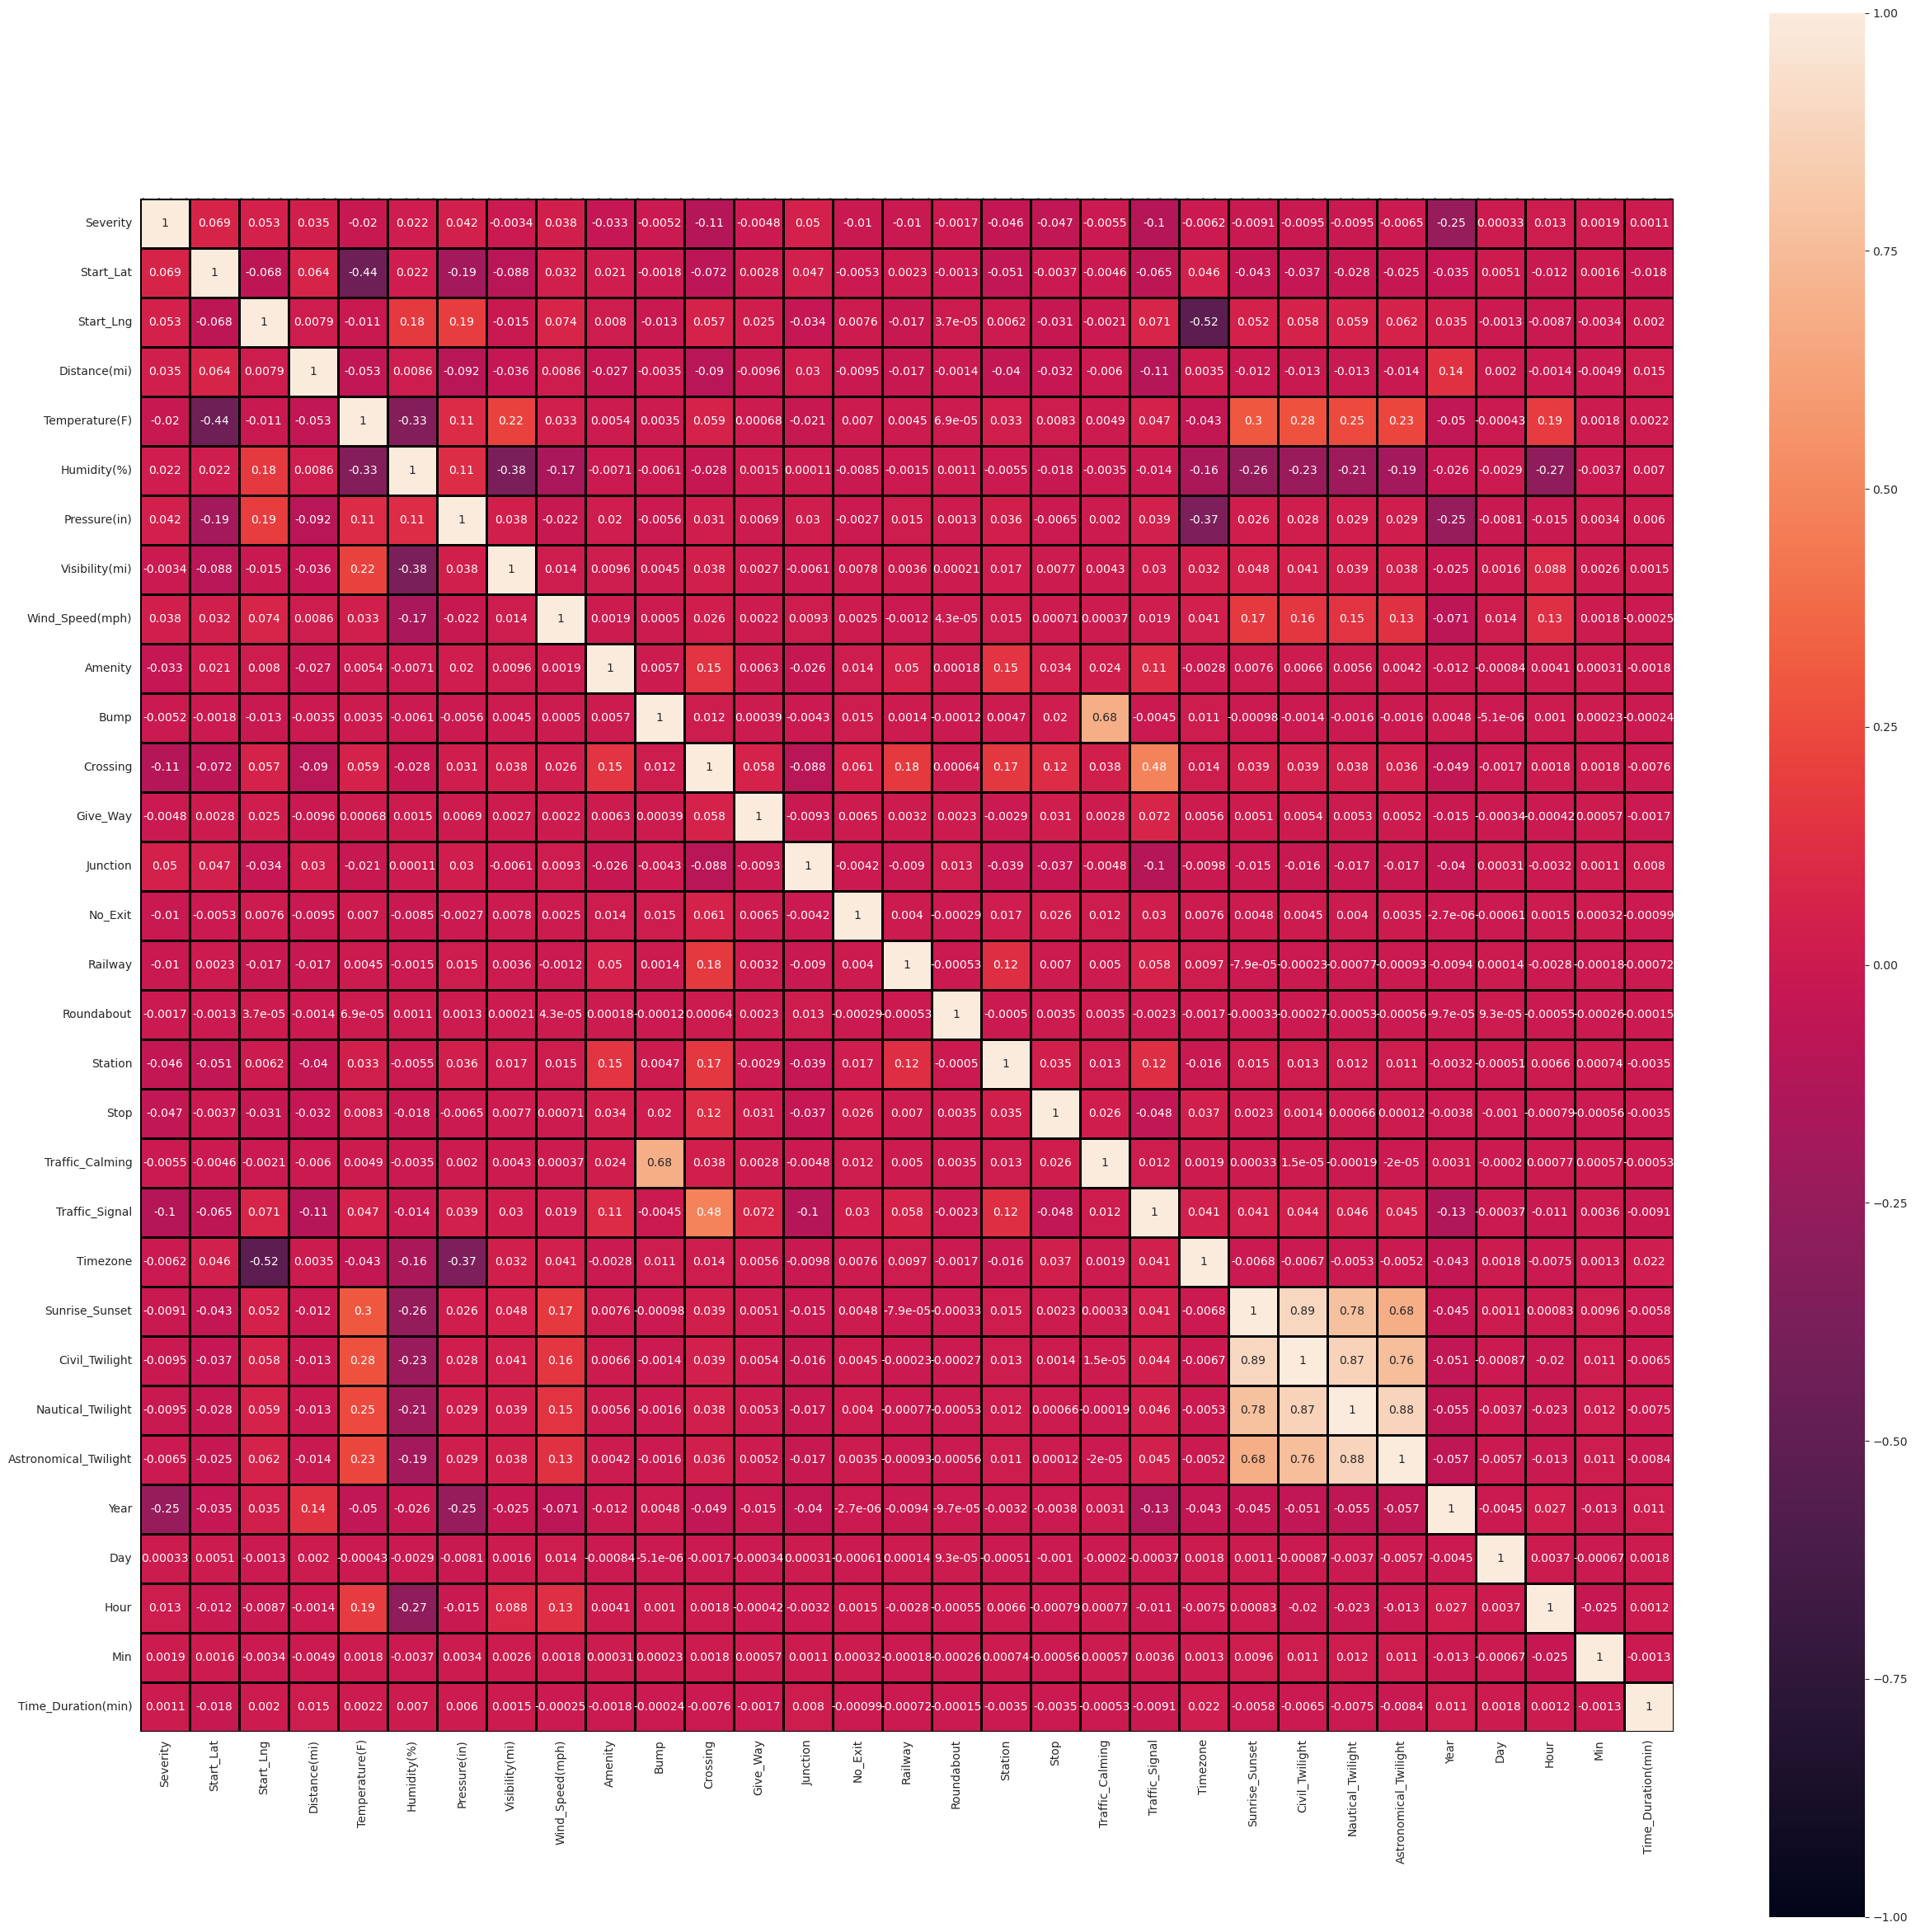

In [37]:
corr_matrix = df_clean.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

#### Observations
- Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomial_Twilight, have only Day and Night binary values and are correlated with Temperature and Humidity so we keep only **Temperature, Humidity and one of the Light related i.e. Sunrise_Sunset Columns**
- We can have a more closure look on the correlation between features and target attribute below, and remove all collumns which are less correlated

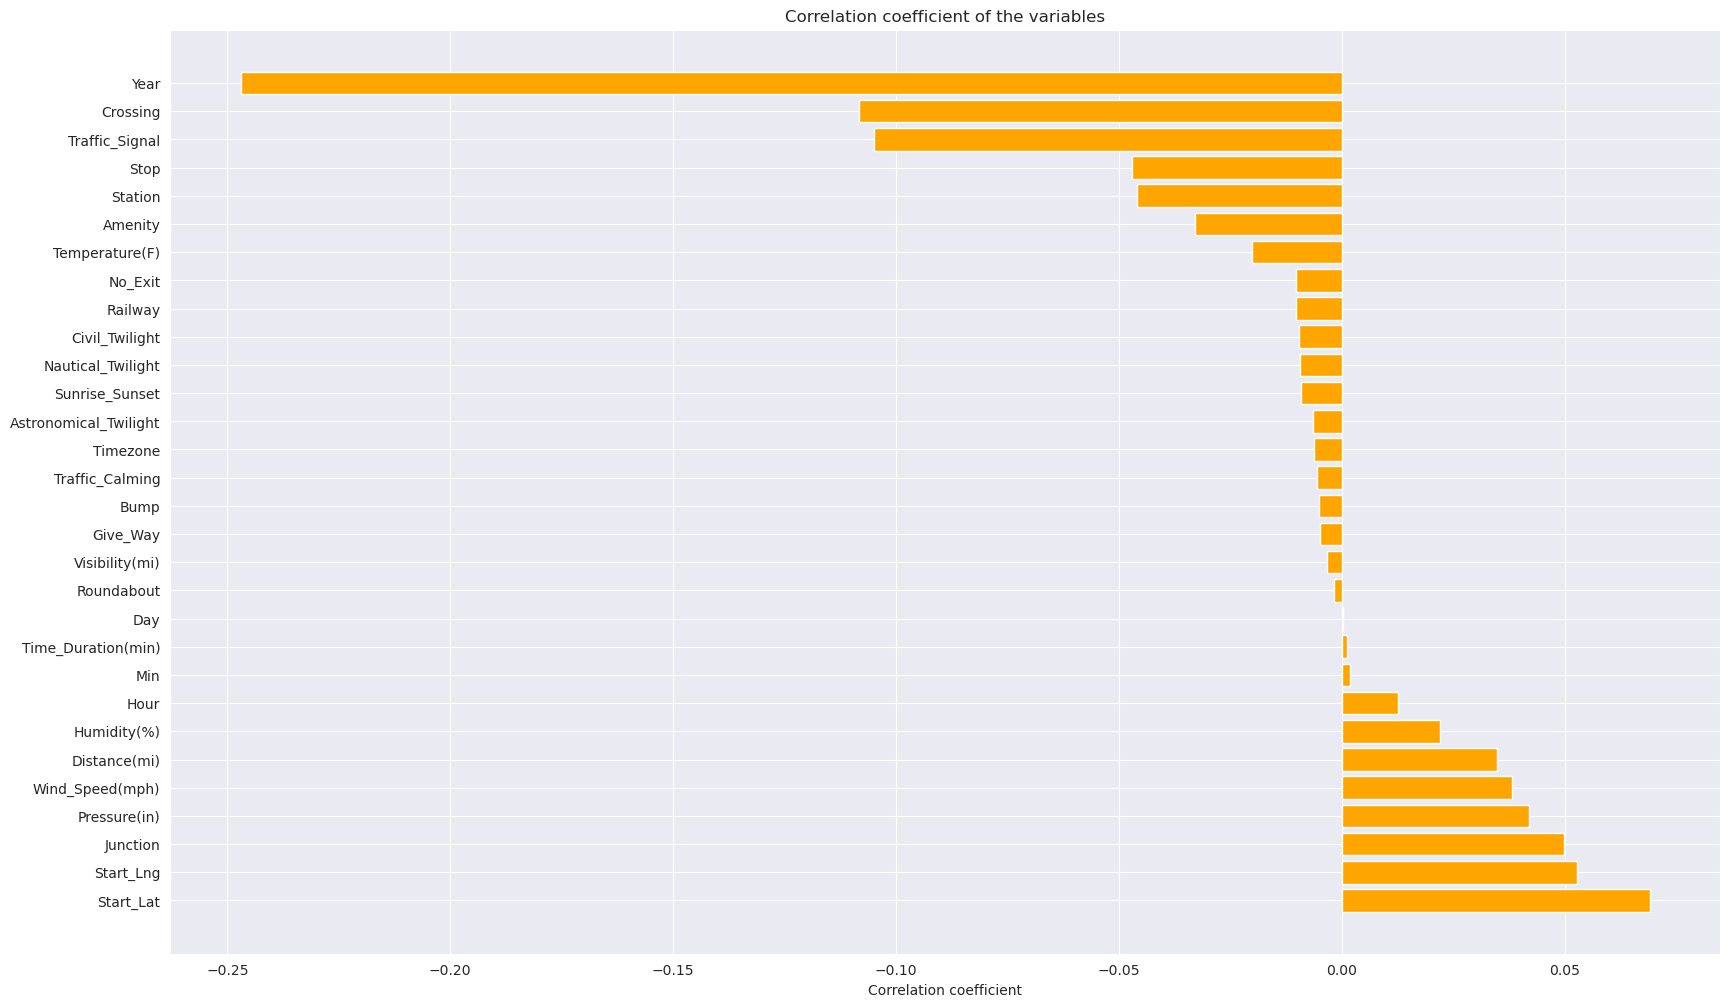

In [38]:
### Correlation between num features wrt the target attributes
x_cols = [col for col in df_clean.columns if col not in ['Severity'] if df_clean[col].dtype in ['float32','uint8','bool','uint16']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_clean[col].values, df_clean.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = (corr_df.sort_values(by='corr_values',ascending = False)).reset_index()
corr_df

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(20,12))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='orange')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

#### Observations
- We remove most of the features that have a less than or equal to +/- 0.01 coorelation to Severity
- Also we have -ve correlation with Year, which might be mainly because in later years the severity level is decreasing, we observe in the next plot

In [39]:
# All these less correlated features will be removed
less_corr_features = corr_df[(corr_df.corr_values>=-0.01) & (corr_df.corr_values<=0.01)].col_labels[:]
less_corr = less_corr_features.to_list()
less_corr

['Min',
 'Time_Duration(min)',
 'Day',
 'Roundabout',
 'Visibility(mi)',
 'Give_Way',
 'Bump',
 'Traffic_Calming',
 'Timezone',
 'Astronomical_Twilight',
 'Sunrise_Sunset',
 'Nautical_Twilight',
 'Civil_Twilight']

<a id="t5.6."></a>
### Observing Year wise distribution of Accidents for every level of Severity

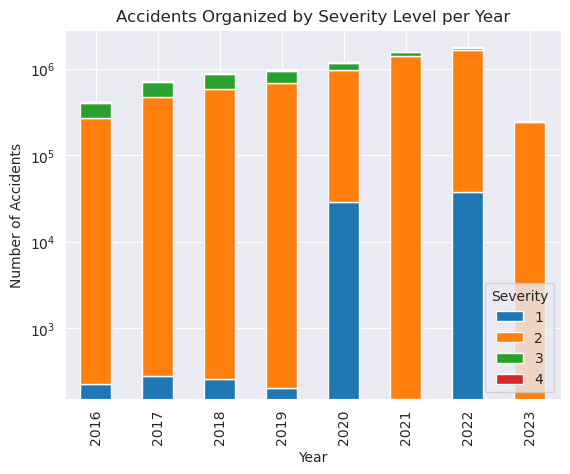

In [40]:
# Perform groupby operation
grouped = df_clean.groupby(['Year', 'Severity'])['Start_Lat'].count()

# Convert the result to a DataFrame
df_pivot = grouped.reset_index()

# Pivot the DataFrame
df_pivot = df_pivot.pivot(index='Year', columns='Severity', values='Start_Lat')

# Display the pivoted DataFrame
#print(df_pivot)

# Plot the stacked bar chart
ax = df_pivot.plot.bar(stacked=True)

# Set the y-axis scale to logarithmic
ax.set_yscale("log")
# Set the title and axis labels
plt.title("Accidents Organized by Severity Level per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.savefig("Accidents_Organized_by_Severity_Level_per_Year.png",bbox_inches = 'tight', dpi = 300)
# Show the plot
plt.show()

#### Observations
- Over the years we have more number of accidents but with accidents are becoming less severe
- Another observation we can make that accident's are increasing over the years
- We can see steep rise in Severity level 1 accidents in 2020, maybe mostly of Covid we didn't have major accidents
- This rise can again be seen in 2022

<a id="t6."></a>
## 6. Data Cleaning and Transformation P2

<a id="t6.1."></a>
### Feature Selection
- We drop all the less correlated columns
- We drop descriptions, as most descriptions only report the name of the road of the accident, so dropping it ensures simplicity
- We drop street, county, zipcode, state and only keep city to focus as a mid data point from all the spatial features having just enough values to be numerically encoded
- We drop Airport_Code, Weather_Timestamp  because they are not useful much for our task
- We drop Start and End Time, because we have the same information in Hr itself.

In [41]:
dropped_cols = less_corr + ["Description",'Street','County','Zipcode','State','Airport_Code','Weather_Timestamp','Start_Time','End_Time']
dropped_cols

['Min',
 'Time_Duration(min)',
 'Day',
 'Roundabout',
 'Visibility(mi)',
 'Give_Way',
 'Bump',
 'Traffic_Calming',
 'Timezone',
 'Astronomical_Twilight',
 'Sunrise_Sunset',
 'Nautical_Twilight',
 'Civil_Twilight',
 'Description',
 'Street',
 'County',
 'Zipcode',
 'State',
 'Airport_Code',
 'Weather_Timestamp',
 'Start_Time',
 'End_Time']

In [42]:
df_clean = df_clean.drop(dropped_cols,axis = 1)

In [43]:
df_clean.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Stop,Traffic_Signal,Source,City,Wind_Direction,Weather_Condition,Year,Month,Hour,Weekday
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,39.865147,-84.058723,0.01,36.900002,91.0,29.680000,7.68549,False,False,...,False,False,Source2,Dayton,Calm,Light Rain,2016,Feb,5,Mon
A-2,2,39.928059,-82.831184,0.01,37.900002,100.0,29.650000,7.68549,False,False,...,False,False,Source2,Reynoldsburg,Calm,Light Rain,2016,Feb,6,Mon
A-3,2,39.063148,-84.032608,0.01,36.000000,100.0,29.670000,3.50000,False,False,...,False,True,Source2,Williamsburg,SW,Overcast,2016,Feb,6,Mon
A-4,3,39.747753,-84.205582,0.01,35.099998,96.0,29.639999,4.60000,False,False,...,False,False,Source2,Dayton,SW,Mostly Cloudy,2016,Feb,7,Mon
A-5,2,39.627781,-84.188354,0.01,36.000000,89.0,29.650000,3.50000,False,False,...,False,True,Source2,Dayton,SW,Mostly Cloudy,2016,Feb,7,Mon


In [44]:
df_clean.describe().round(3)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Year,Hour
count,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000,7728394.000
mean,2.212,36.201,-94.702,0.562,61.663,64.831,29.539,7.685,2019.908,12.329
std,0.488,5.076,17.392,1.777,18.811,22.562,0.997,5.221,1.915,5.465
min,1.000,24.555,-124.624,0.000,-89.000,1.000,0.000,0.000,2016.000,0.000
25%,2.000,33.400,-117.219,0.000,50.000,49.000,29.380,5.000,2018.000,8.000
50%,2.000,35.824,-87.767,0.030,63.000,66.000,29.850,7.685,2020.000,13.000
75%,2.000,40.085,-80.354,0.464,76.000,84.000,30.030,10.000,2022.000,17.000
max,4.000,49.002,-67.113,441.750,207.000,100.000,58.630,1087.000,2023.000,23.000


In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728394 entries, A-1 to A-7777761
Data columns (total 24 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Severity           uint8   
 1   Start_Lat          float32 
 2   Start_Lng          float32 
 3   Distance(mi)       float32 
 4   Temperature(F)     float32 
 5   Humidity(%)        float32 
 6   Pressure(in)       float32 
 7   Wind_Speed(mph)    float32 
 8   Amenity            bool    
 9   Crossing           bool    
 10  Junction           bool    
 11  No_Exit            bool    
 12  Railway            bool    
 13  Station            bool    
 14  Stop               bool    
 15  Traffic_Signal     bool    
 16  Source             category
 17  City               category
 18  Wind_Direction     category
 19  Weather_Condition  string  
 20  Year               uint16  
 21  Month              category
 22  Hour               uint8   
 23  Weekday            category
dtypes: bool(8), category(5), 

<a id="t6.2."></a>
### Drop duplicates

In [46]:
print("Number of rows:", len(df_clean.index))
df_clean.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df_clean.index))

Number of rows: 7728394
Number of rows after drop of duplicates: 7240807


In [47]:
### Taking a look at data stats
df_clean.describe().round(3)

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Year,Hour
count,7240807.000,7240807.000,7240807.000,7240807.000,7240807.000,7240807.000,7240807.000,7240807.000,7240807.000,7240807.000
mean,2.223,36.240,-94.814,0.552,61.671,64.941,29.547,7.682,2019.834,12.293
std,0.496,5.030,17.351,1.792,18.812,22.558,0.988,5.203,1.932,5.442
min,1.000,24.555,-124.624,0.000,-89.000,1.000,0.000,0.000,2016.000,0.000
25%,2.000,33.440,-117.229,0.000,50.000,49.000,29.390,5.000,2018.000,8.000
50%,2.000,35.825,-87.921,0.013,63.000,66.000,29.850,7.685,2020.000,13.000
75%,2.000,40.078,-80.401,0.450,75.900,84.000,30.030,10.000,2021.000,17.000
max,4.000,49.002,-67.113,441.750,207.000,100.000,58.630,1087.000,2023.000,23.000


#### Observsations from data stats after dropping duplicates
- We have missing values in Pressure because in real life having 0 for pressure speaks for invalid instances
- Hour can have 0 value, denoting the midnight, likewise Distance can also be 0
- So we have to drop those instances for which we don't have Pressure values itself

In [48]:
### Removing instances which have null values for Pressure feature
df_clean = df_clean[df_clean["Pressure(in)"] != 0]
len(df_clean.index) 

7240804

<a id="t6.3."></a>
### Categorizing the categorical columns

In [49]:
unique_weather = (df_clean["Weather_Condition"].unique())

print(len(unique_weather))
print(list((unique_weather)))

144
['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Fair', 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm', 'Light Rain Shower', 'Light Rain with Thunder', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', 'Light Ice Pellets', 'Ice Pellets', 'Squalls', 'N/A Precipitation', '

In [50]:
# Categorizing the weather conditions
#Assign categories based on weather conditions
df_clean.loc[df_clean["Weather_Condition"].str.contains("Rain|Drizzle|Shower|Precipitation", na=False), "Weather_Condition"] = "Rain"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Cloudy|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Fog|Mist", na=False), "Weather_Condition"] = "Fog"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Clear|Fair", na=False), "Weather_Condition"] = "Clear"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_clean.loc[df_clean["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"

df_clean["Weather_Condition"] = df_clean["Weather_Condition"].astype('category')

In [51]:
df_clean.Weather_Condition.value_counts()

Clear               3334278
Cloudy              2779484
Rain                 512429
Scattered Clouds     203050
Snow                 160847
Fog                  104222
Haze                  71731
Thunderstorm          60092
Smoke                 11914
Windy                  1528
Sand                    706
Hail                    475
Funnel Cloud             22
Tornado                  16
Light Haze               10
Name: Weather_Condition, dtype: int64

In [52]:
# Categorizing the wind direction 
df_clean["Wind_Direction"].unique().to_list()

['Calm',
 'SW',
 'SSW',
 'WSW',
 'WNW',
 'NW',
 'West',
 'NNW',
 'NNE',
 'South',
 'North',
 'Variable',
 'SE',
 'SSE',
 'ESE',
 'East',
 'NE',
 'ENE',
 'E',
 'W',
 'CALM',
 'S',
 'VAR',
 'N']

In [53]:
conditions = [
    df_clean['Wind_Direction'].str.contains('N', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('S', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('E', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('W', case=False, na=False),
    df_clean['Wind_Direction'].str.contains('V|C', case=False, na=False)
]

choices = ['North', 'South', 'East', 'West', 'Variable']
df_clean['Wind_Direction'] = np.select(conditions, choices, default=df_clean['Wind_Direction'])

df_clean['Wind_Direction'] = df_clean['Wind_Direction'].astype('category')

# Does the same thing as the vectorized version
# df.loc[df['Wind_Direction'].str.contains('N', case=False, na=False), 'Wind_Direction'] = 'North'
# df.loc[df['Wind_Direction'].str.contains('S', case=False, na=False), 'Wind_Direction'] = 'South'
# df.loc[df['Wind_Direction'].str.contains('E', case=False, na=False), 'Wind_Direction'] = 'East'
# df.loc[df['Wind_Direction'].str.contains('W', case=False, na=False), 'Wind_Direction'] = 'West'
# df.loc[df['Wind_Direction'].str.contains('V|C', case=False, na=False), 'Wind_Direction'] = 'Variable'
# df['Wind_Direction'] = df['Wind_Direction'].astype('category')

In [54]:
df_clean["Wind_Direction"].unique().to_list()

['Variable', 'South', 'North', 'East', 'West']

In [55]:
df_clean.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Wind_Speed(mph)      0
Amenity              0
Crossing             0
Junction             0
No_Exit              0
Railway              0
Station              0
Stop                 0
Traffic_Signal       0
Source               0
City                 0
Wind_Direction       0
Weather_Condition    0
Year                 0
Month                0
Hour                 0
Weekday              0
dtype: int64

In [56]:
df_clean.describe().round(3) #Observing the feature variances

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Year,Hour
count,7240804.000,7240804.000,7240804.000,7240804.000,7240804.000,7240804.000,7240804.000,7240804.000,7240804.000,7240804.000
mean,2.223,36.240,-94.814,0.552,61.671,64.941,29.547,7.682,2019.834,12.293
std,0.496,5.030,17.351,1.792,18.812,22.558,0.988,5.203,1.932,5.442
min,1.000,24.555,-124.624,0.000,-89.000,1.000,0.020,0.000,2016.000,0.000
25%,2.000,33.440,-117.229,0.000,50.000,49.000,29.390,5.000,2018.000,8.000
50%,2.000,35.825,-87.921,0.013,63.000,66.000,29.850,7.685,2020.000,13.000
75%,2.000,40.078,-80.401,0.450,75.900,84.000,30.030,10.000,2021.000,17.000
max,4.000,49.002,-67.113,441.750,207.000,100.000,58.630,1087.000,2023.000,23.000


In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7240804 entries, A-1 to A-7777761
Data columns (total 24 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Severity           uint8   
 1   Start_Lat          float32 
 2   Start_Lng          float32 
 3   Distance(mi)       float32 
 4   Temperature(F)     float32 
 5   Humidity(%)        float32 
 6   Pressure(in)       float32 
 7   Wind_Speed(mph)    float32 
 8   Amenity            bool    
 9   Crossing           bool    
 10  Junction           bool    
 11  No_Exit            bool    
 12  Railway            bool    
 13  Station            bool    
 14  Stop               bool    
 15  Traffic_Signal     bool    
 16  Source             category
 17  City               category
 18  Wind_Direction     category
 19  Weather_Condition  category
 20  Year               uint16  
 21  Month              category
 22  Hour               uint8   
 23  Weekday            category
dtypes: bool(8), category(6), 

<a id="t6.4."></a>
### Handling Unbalanced Data before encoding the categorical columns

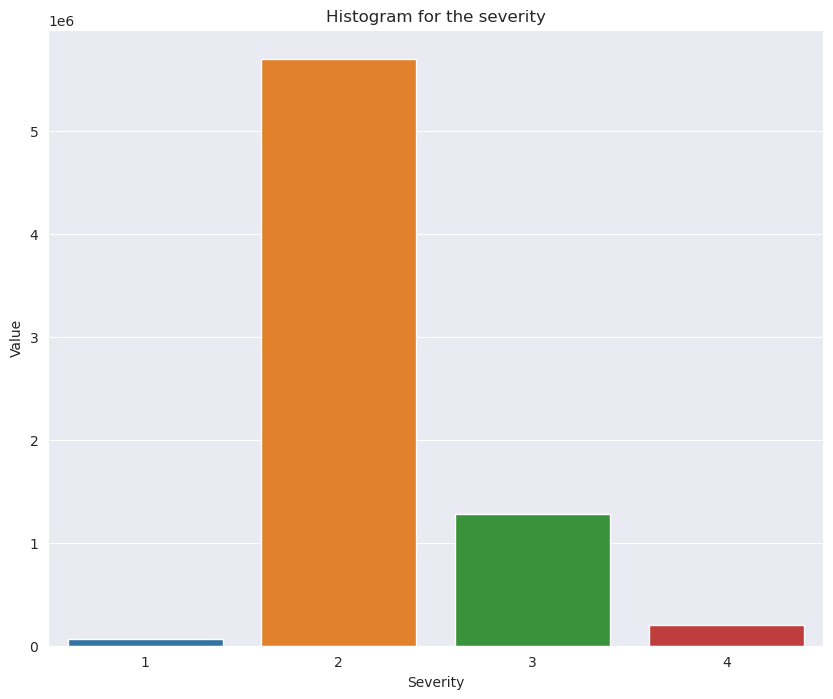

In [58]:
severity_counts = df_clean["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x = severity_counts.index,y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.savefig("UnBalanced_Severity.png",bbox_inches = 'tight', dpi = 300)
plt.show()

#### Observations
- We can see we have highly unbalanced data wrt 2nd Severity level
- To balance it, we will undersample the records to match the number of records of Severity level 1 i.e. the minority category
- So we undersample 2, 3, 4 Severity level instances randomly to the minority category
- It's around 65k per category in our case

In [59]:
size = len(df_clean[df_clean["Severity"]==1].index)
size

63093

In [60]:
x = pd.DataFrame()
for i in range(1,5):
    S = df_clean[df_clean["Severity"]==i]
    x = pd.concat([x,S.sample(size, random_state=42)],axis = 0)
df_balanced = x

In [61]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252372 entries, A-516257 to A-4833008
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           252372 non-null  uint8   
 1   Start_Lat          252372 non-null  float32 
 2   Start_Lng          252372 non-null  float32 
 3   Distance(mi)       252372 non-null  float32 
 4   Temperature(F)     252372 non-null  float32 
 5   Humidity(%)        252372 non-null  float32 
 6   Pressure(in)       252372 non-null  float32 
 7   Wind_Speed(mph)    252372 non-null  float32 
 8   Amenity            252372 non-null  bool    
 9   Crossing           252372 non-null  bool    
 10  Junction           252372 non-null  bool    
 11  No_Exit            252372 non-null  bool    
 12  Railway            252372 non-null  bool    
 13  Station            252372 non-null  bool    
 14  Stop               252372 non-null  bool    
 15  Traffic_Signal     252372 non

In [62]:
df_balanced.shape

(252372, 24)

In [63]:
df_balanced.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Year,Hour
count,252372.000000,252372.000000,252372.000000,252372.000000,252372.00000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000
mean,2.500000,36.544941,-92.922272,0.646209,63.65704,64.977539,29.462416,7.635669,2019.892734,11.977858
std,1.118036,4.860607,16.625311,2.330267,18.54608,23.377157,1.080032,5.079292,1.921010,5.571586
min,1.000000,24.571239,-124.497421,0.000000,-35.00000,1.000000,19.639999,0.000000,2016.000000,0.000000
25%,1.750000,33.536720,-110.937103,0.000000,52.00000,49.000000,29.280001,5.000000,2018.000000,7.000000
50%,2.500000,36.327669,-86.031693,0.000000,66.00000,67.000000,29.799999,7.000000,2020.000000,12.000000
75%,3.250000,40.196709,-80.204163,0.410000,77.00000,85.000000,30.010000,10.000000,2022.000000,17.000000
max,4.000000,49.000259,-67.626579,183.119995,207.00000,100.000000,58.630001,214.000000,2023.000000,23.000000


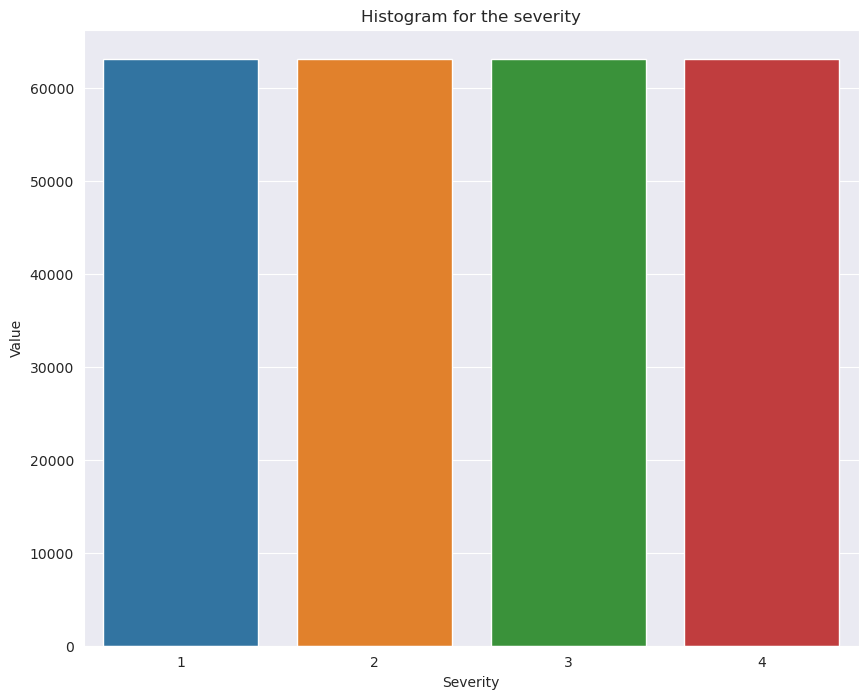

In [64]:
severity_counts = df_balanced["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x = severity_counts.index,y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.savefig("Balanced_Severity.png",bbox_inches = 'tight', dpi = 300)
plt.show()

<a id="t6.5."></a>
### Feature Scaling
- Normalizing the features to improve model performance

In [65]:
num_features = (df_balanced.select_dtypes(include = ['float32','uint8','uint16',],exclude = ['bool']).columns).to_list()
cat_features = (df_balanced.select_dtypes(exclude = ['float32','uint8','uint16','bool','int64']).columns).to_list()
bool_features = (df_balanced.select_dtypes(include= ['bool']).columns).to_list()

In [66]:
cat_features,num_features,bool_features

(['Source', 'City', 'Wind_Direction', 'Weather_Condition', 'Month', 'Weekday'],
 ['Severity',
  'Start_Lat',
  'Start_Lng',
  'Distance(mi)',
  'Temperature(F)',
  'Humidity(%)',
  'Pressure(in)',
  'Wind_Speed(mph)',
  'Year',
  'Hour'],
 ['Amenity',
  'Crossing',
  'Junction',
  'No_Exit',
  'Railway',
  'Station',
  'Stop',
  'Traffic_Signal'])

In [67]:
num_features.remove("Severity")

In [68]:
scaler = MinMaxScaler()
#features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(,'Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
df_balanced[num_features] = scaler.fit_transform(df_balanced[num_features])
df_balanced

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Stop,Traffic_Signal,Source,City,Wind_Direction,Weather_Condition,Year,Month,Hour,Weekday
ID,,,,,,,,,,,,,,,,,,,,,
A-516257,1,0.432037,0.767075,0.000000,0.466942,0.868687,0.244935,0.042056,False,False,...,False,False,Source3,Charlotte,South,Cloudy,0.857147,Sep,0.739130,Mon
A-538238,1,0.383149,0.114368,0.000000,0.524793,0.313131,0.259297,0.037383,False,False,...,False,True,Source2,Whittier,South,Clear,0.857147,Aug,0.695652,Fri
A-7081307,1,0.316269,0.237419,0.000000,0.557851,0.060606,0.194409,0.032710,False,True,...,False,True,Source1,Tucson,North,Clear,0.571442,Jun,0.565217,Thu
A-7003855,1,0.139038,0.734430,0.000000,0.450413,0.868687,0.263657,0.060748,False,False,...,False,True,Source1,Clearwater,South,Cloudy,0.571442,Apr,0.434783,Thu
A-542086,1,0.617481,0.171282,0.000000,0.371901,0.737374,0.112080,0.023364,False,False,...,False,False,Source2,Ely,South,Clear,0.857147,Aug,0.173913,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-7715009,4,0.342285,0.781617,0.000688,0.384297,0.575758,0.262119,0.023364,False,False,...,False,False,Source1,Charleston,South,Clear,0.428589,Apr,0.000000,Sat
A-7181021,4,0.622193,0.342993,0.000000,0.239669,0.929293,0.124647,0.037383,False,False,...,False,False,Source1,Denver,North,Snow,0.571442,Apr,0.782609,Thu
A-7707275,4,0.610484,0.830880,0.000038,0.380165,0.585859,0.261862,0.028037,False,False,...,False,False,Source1,Frederick,South,Clear,0.428589,Apr,0.826087,Thu


In [69]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252372 entries, A-516257 to A-4833008
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           252372 non-null  uint8   
 1   Start_Lat          252372 non-null  float32 
 2   Start_Lng          252372 non-null  float32 
 3   Distance(mi)       252372 non-null  float32 
 4   Temperature(F)     252372 non-null  float32 
 5   Humidity(%)        252372 non-null  float32 
 6   Pressure(in)       252372 non-null  float32 
 7   Wind_Speed(mph)    252372 non-null  float32 
 8   Amenity            252372 non-null  bool    
 9   Crossing           252372 non-null  bool    
 10  Junction           252372 non-null  bool    
 11  No_Exit            252372 non-null  bool    
 12  Railway            252372 non-null  bool    
 13  Station            252372 non-null  bool    
 14  Stop               252372 non-null  bool    
 15  Traffic_Signal     252372 non

In [70]:
df_balanced.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Year,Hour
count,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000
mean,2.500000,0.490143,0.555208,0.003529,0.407674,0.646238,0.251921,0.035681,0.556117,0.520777
std,1.118036,0.198969,0.292335,0.012725,0.076637,0.236133,0.027700,0.023735,0.274425,0.242243
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.367001,0.238441,0.000000,0.359504,0.484848,0.247243,0.023364,0.285736,0.304348
50%,2.500000,0.481249,0.676370,0.000000,0.417355,0.666667,0.260580,0.032710,0.571442,0.521739
75%,3.250000,0.639627,0.778840,0.002239,0.462810,0.848485,0.265966,0.046729,0.857147,0.739130
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Encoding Categorical Cols 

In [71]:
df_balanced = df_balanced.replace([True, False], [1, 0])
df_balanced[bool_features] = df_balanced[bool_features].astype('uint8')
df_balanced.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Stop,Traffic_Signal,Source,City,Wind_Direction,Weather_Condition,Year,Month,Hour,Weekday
ID,,,,,,,,,,,,,,,,,,,,,
A-516257,1,0.432037,0.767075,0.0,0.466942,0.868687,0.244935,0.042056,0,0,...,0,0,Source3,Charlotte,South,Cloudy,0.857147,Sep,0.739130,Mon
A-538238,1,0.383149,0.114368,0.0,0.524793,0.313131,0.259297,0.037383,0,0,...,0,1,Source2,Whittier,South,Clear,0.857147,Aug,0.695652,Fri
A-7081307,1,0.316269,0.237419,0.0,0.557851,0.060606,0.194409,0.032710,0,1,...,0,1,Source1,Tucson,North,Clear,0.571442,Jun,0.565217,Thu
A-7003855,1,0.139038,0.734430,0.0,0.450413,0.868687,0.263657,0.060748,0,0,...,0,1,Source1,Clearwater,South,Cloudy,0.571442,Apr,0.434783,Thu
A-542086,1,0.617481,0.171282,0.0,0.371901,0.737374,0.112080,0.023364,0,0,...,0,0,Source2,Ely,South,Clear,0.857147,Aug,0.173913,Tue


### Checkpoint creation of balanced dataset

In [72]:
name_p = "test.pickle"
df_balanced.to_pickle(name_p)

In [73]:
df_balanced = pd.read_pickle(name_p)

In [74]:
onehot_cols = list(set(cat_features) - set(["City"]))
onehot_cols

['Month', 'Source', 'Weekday', 'Wind_Direction', 'Weather_Condition']

In [75]:
df_balanced[onehot_cols].nunique() # As the number of unique values is less, we can one hot encode them.

Month                12
Source                3
Weekday               7
Wind_Direction        5
Weather_Condition    14
dtype: int64

In [76]:
df_balanced = pd.get_dummies(df_balanced, columns=onehot_cols, drop_first=True)
df_balanced.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Weather_Condition_Haze,Weather_Condition_Light Haze,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
ID,,,,,,,,,,,,,,,,,,,,,
A-516257,1,0.432037,0.767075,0.0,0.466942,0.868687,0.244935,0.042056,0,0,...,0,0,0,0,0,0,0,0,0,0
A-538238,1,0.383149,0.114368,0.0,0.524793,0.313131,0.259297,0.037383,0,0,...,0,0,0,0,0,0,0,0,0,0
A-7081307,1,0.316269,0.237419,0.0,0.557851,0.060606,0.194409,0.032710,0,1,...,0,0,0,0,0,0,0,0,0,0
A-7003855,1,0.139038,0.734430,0.0,0.450413,0.868687,0.263657,0.060748,0,0,...,0,0,0,0,0,0,0,0,0,0
A-542086,1,0.617481,0.171282,0.0,0.371901,0.737374,0.112080,0.023364,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252372 entries, A-516257 to A-4833008
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Severity                            252372 non-null  uint8   
 1   Start_Lat                           252372 non-null  float32 
 2   Start_Lng                           252372 non-null  float32 
 3   Distance(mi)                        252372 non-null  float32 
 4   Temperature(F)                      252372 non-null  float32 
 5   Humidity(%)                         252372 non-null  float32 
 6   Pressure(in)                        252372 non-null  float32 
 7   Wind_Speed(mph)                     252372 non-null  float32 
 8   Amenity                             252372 non-null  uint8   
 9   Crossing                            252372 non-null  uint8   
 10  Junction                            252372 non-null  uint8   
 11  No_Exit 

<a id="t6.6."></a>
### Target encoding for cities
- First let's observe the city columns
- Cities are highly cardinal so we will use target encoding combined with smoothing
- The main purpose of using smoothing is presence of rare cities, that occurs very few times in 260K records
- The idea is to blend the in-category average with the overall average. Rare categories get less weight on their category average, while missing categories just get the overall average. [Reference for details](https://www.kaggle.com/code/ryanholbrook/target-encoding)
- For smoothing I am choosing a value of 3, because the target column doesn't have too much noisy value, i.e. for different cities the target has to only be chosen from 4 Severity levels.
- Fun fact doing smoothing with m-value of 3 turned out to be equal to mean-target-encoding

- **One can also try binary encoding instead of target encoding, this will produce log2(nunique_values) columns for a single column consisting of nunique_values**
- The main reason I am not using this as thumb of rule binary encoding is not considered suitable, if there is no inherent ordinal relationship among the cities. I am assuming the cities are not inter-related, but yup this method can also be tried **given that all the cities belong to US** most of the cities are related to one another

In [78]:
city_counts = df_balanced["City"].value_counts()
city_counts

# Since City is a category column we also see the cities that were removed during the sampling, 
# the main reason they are being shown here is pd, keeps the full representation of categorical columns

Charlotte      4366
Dallas         4056
Houston        3795
Los Angeles    3504
Phoenix        3354
               ... 
Harrodsburg       0
Harrogate         0
Regent            0
Refugio           0
Aaronsburg        0
Name: City, Length: 13678, dtype: int64

In [79]:
# Confirming cities with 0 counts are not present in our dataframe
zero_count_cities = city_counts[city_counts == 0].index
instances = df_balanced[df_balanced["City"].isin(zero_count_cities)]
instances.sort_values(by = ["City"]) 

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Weather_Condition_Haze,Weather_Condition_Light Haze,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy
ID,,,,,,,,,,,,,,,,,,,,,


In [80]:
city_counts[city_counts > 0] # So we have to encode 9336 cities

Charlotte          4366
Dallas             4056
Houston            3795
Los Angeles        3504
Phoenix            3354
                   ... 
Lynn Haven            1
Belhaven              1
Manhattan Beach       1
Lytle                 1
Dry Run               1
Name: City, Length: 9270, dtype: int64

In [81]:
city_counts[ (0<city_counts) & (city_counts < 6)] # There are around 5000 rare categories
# So we choose to use smoothing along with target encoding

Gibsland           5
Holden             5
Saco               5
Gibsonburg         5
Saint Albans       5
                  ..
Lynn Haven         1
Belhaven           1
Manhattan Beach    1
Lytle              1
Dry Run            1
Name: City, Length: 5047, dtype: int64

In [82]:
df_balanced["city_mean_encoded"] = (df_balanced.groupby("City")["Severity"].transform("mean")).astype('float32')

df_balanced[["City", "Severity", "city_mean_encoded"]].sort_values(by = "Severity",ascending = True)

,City,Severity,city_mean_encoded
ID,,,
A-516257,Charlotte,1,1.605360
A-7183124,Broomfield,1,2.857143
A-596411,Myrtle Beach,1,1.530075
A-538902,Goose Creek,1,1.461538
A-7092343,Centerville,1,2.645161
...,...,...,...
A-3520637,Naugatuck,4,3.500000
A-7493048,Waldorf,4,3.173913
A-4492980,Enterprise,4,2.285714


In [83]:
X = df_balanced.copy()
y = X.pop('Severity')

In [84]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["City"], m = 3)

# Fit the encoder on the encoding split.
encoder.fit(X, y)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X)

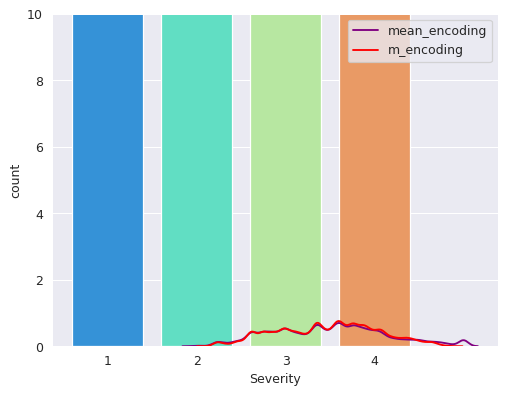

In [85]:
plt.figure(dpi=90)
ax = sns.countplot(x = y, palette= 'rainbow')
ax = sns.kdeplot(X_train.city_mean_encoded, color='purple', ax=ax)
ax = sns.kdeplot(X_train.City, color='red', ax=ax)
ax.set_xlabel("Severity")
ax.set_ylim([0,10])
ax.legend(labels=['mean_encoding', 'm_encoding'],loc = 'upper right');
plt.savefig("Target_Encoding.png",bbox_inches = 'tight', dpi = 300)
plt.show()

- We can observe that target encoding with smoothing is well encoded to the Severity values
- It also resembles to target encoding with mean values

In [86]:
# Dropping the m_encoding as it is same as mean_encoding.
df_balanced.drop(["City"],inplace = True,axis = 1)

In [87]:
df_balanced

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Weather_Condition_Light Haze,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,city_mean_encoded
ID,,,,,,,,,,,,,,,,,,,,,
A-516257,1,0.432037,0.767075,0.000000,0.466942,0.868687,0.244935,0.042056,0,0,...,0,0,0,0,0,0,0,0,0,1.605360
A-538238,1,0.383149,0.114368,0.000000,0.524793,0.313131,0.259297,0.037383,0,0,...,0,0,0,0,0,0,0,0,0,2.520349
A-7081307,1,0.316269,0.237419,0.000000,0.557851,0.060606,0.194409,0.032710,0,1,...,0,0,0,0,0,0,0,0,0,1.229062
A-7003855,1,0.139038,0.734430,0.000000,0.450413,0.868687,0.263657,0.060748,0,0,...,0,0,0,0,0,0,0,0,0,1.548485
A-542086,1,0.617481,0.171282,0.000000,0.371901,0.737374,0.112080,0.023364,0,0,...,0,0,0,0,0,0,0,0,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-7715009,4,0.342285,0.781617,0.000688,0.384297,0.575758,0.262119,0.023364,0,0,...,0,0,0,0,0,0,0,0,0,2.818182
A-7181021,4,0.622193,0.342993,0.000000,0.239669,0.929293,0.124647,0.037383,0,0,...,0,0,0,0,0,1,0,0,0,2.534639
A-7707275,4,0.610484,0.830880,0.000038,0.380165,0.585859,0.261862,0.028037,0,0,...,0,0,0,0,0,0,0,0,0,3.100313


In [88]:
df_balanced.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Weather_Condition_Light Haze,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,city_mean_encoded
count,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,...,252372.0,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000,252372.000000
mean,2.500000,0.490143,0.555208,0.003529,0.407674,0.646238,0.251921,0.035681,0.012196,0.127625,...,0.0,0.068744,0.000087,0.026239,0.001280,0.019491,0.008456,0.000004,0.000143,2.500000
std,1.118036,0.198969,0.292335,0.012725,0.076637,0.236133,0.027700,0.023735,0.109761,0.333673,...,0.0,0.253018,0.009336,0.159846,0.035752,0.138243,0.091566,0.001991,0.011943,0.640686
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.750000,0.367001,0.238441,0.000000,0.359504,0.484848,0.247243,0.023364,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.991725
50%,2.500000,0.481249,0.676370,0.000000,0.417355,0.666667,0.260580,0.032710,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.529412
75%,3.250000,0.639627,0.778840,0.002239,0.462810,0.848485,0.265966,0.046729,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.917808
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<a id="t6.7."></a>
### Checkpoint Creation of Dataset Before Training Data

In [89]:
df_balanced.to_pickle("final_df.pickle")

In [90]:
df_model = pd.read_pickle("final_df.pickle")

In [91]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252372 entries, A-516257 to A-4833008
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Severity                            252372 non-null  uint8  
 1   Start_Lat                           252372 non-null  float32
 2   Start_Lng                           252372 non-null  float32
 3   Distance(mi)                        252372 non-null  float32
 4   Temperature(F)                      252372 non-null  float32
 5   Humidity(%)                         252372 non-null  float32
 6   Pressure(in)                        252372 non-null  float32
 7   Wind_Speed(mph)                     252372 non-null  float32
 8   Amenity                             252372 non-null  uint8  
 9   Crossing                            252372 non-null  uint8  
 10  Junction                            252372 non-null  uint8  
 11  No_Exit              